# Logistics Performance Analysis
### 1. Introduction
**Dataset Source:**

This dataset contains historical logistics and shipment records, including purchase orders, delivery dates, shipment modes, freight costs, and weights.  
The data has been cleaned and standardized in the previous notebook (`01_data_cleaning.ipynb`).

**Purpose of Logistics Performance Analysis:**
The purpose of this analysis is to evaluate logistics performance using measurable and actionable key performance indicators (KPIs).  
Specifically, this notebook focuses on assessing delivery reliability and cost efficiency, and understanding the trade-offs between timely delivery and freight cost across different shipment modes, countries, and time periods.

**Analysis Scope:**

This performance analysis builds on insights identified during exploratory data analysis (`02_exploratory_data_analysis.ipynb`) and translates them into operational KPIs that can support decision-making and performance monitoring.



In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../Data/cleaned_supply_chain_data.csv")
df.head()

,id,project_code,pq_#,po___so_#,asn_dn_#,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,...,invalid_delivery,weight_kg,freight_cost_usd,inconsistency_check,lead_time_days,schedule_delay_days,on_time,freight_per_kg,delivered_month,delivered_year
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte D'Ivoire,PMO - US,Direct Drop,EXW,Air,...,False,13.0,780.34,False,NaN,0,True,60.026154,2006-06,2006
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,False,358.0,4521.50,False,NaN,0,True,12.629888,2006-11,2006
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte D'Ivoire,PMO - US,Direct Drop,FCA,Air,...,False,171.0,1653.78,False,NaN,0,True,9.671228,2006-08,2006
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,False,1855.0,16007.06,False,NaN,0,True,8.629143,2006-09,2006
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,False,7590.0,45450.08,False,NaN,0,True,5.988153,2006-08,2006


### 2. Delivery Performance KPIs

#### 2.1 On-time Delivery Rate

In [17]:
on_time_rate = (df["on_time"].mean() * 100).round(2)
on_time_rate

np.float64(88.51)

#### 2.2 Invalid Delivery Rate

In [18]:
invalid_delivery_rate = (df["invalid_delivery"].mean() * 100).round(2)
invalid_delivery_rate

np.float64(0.05)

**Insight:**

The overall on-time delivery rate is 88.5%, indicating strong delivery reliability across the logistics network. This suggests that meeting delivery schedules is a clear operational priority, particularly for time-sensitive shipments.

Invalid delivery cases account for only 0.05% of records and are primarily driven by data entry or sequencing issues rather than actual delivery failures. These cases do not materially impact overall performance conclusions.

### 3. Lead Time Performance KPIs

#### 3.1 Median Lead Time

In [19]:
median_lead_time = df["lead_time_days"].median()
median_lead_time

92.0

#### 3.2 Lead Time Variability

In [20]:
q1 = df["lead_time_days"].quantile(0.25)
q3 = df["lead_time_days"].quantile(0.75)
lead_time_IQR = q3 - q1
print(f'IQR: {lead_time_IQR}, Q1: {q1}, Q2: {median_lead_time}, Q3: {q3}')

IQR: 93.0, Q1: 50.0, Q2: 92.0, Q3: 143.0


**Insight:**

Lead time shows significant dispersion. The median lead time is approximately 92 days, while the interquartile range spans 93 days, from 50 days at the 25th percentile to 143 days at the 75th percentile.

This wide interquartile range indicates that shipment durations vary considerably even within the typical delivery window. Although deliveries are often completed on time, planning predictability remains a challenge due to inconsistent lead times.

From an operational perspective, improving lead time consistency may provide greater value than focusing solely on reducing average delivery duration.

### 4. Freight Cost Efficiency KPIs

#### 4.1 Median Freight Cost per Kg

In [21]:
median_freight_per_kg = df["freight_per_kg"].median()
median_freight_per_kg

6.3246406109613655

#### 4.2 Freight Cost per Kg by Shipment Mode

In [22]:
df.groupby("shipment_mode")["freight_per_kg"].median().sort_values(ascending = False)

shipment_mode
Air            9.346775
Air Charter    3.852769
Truck          1.822779
Ocean          1.620668
Name: freight_per_kg, dtype: float64

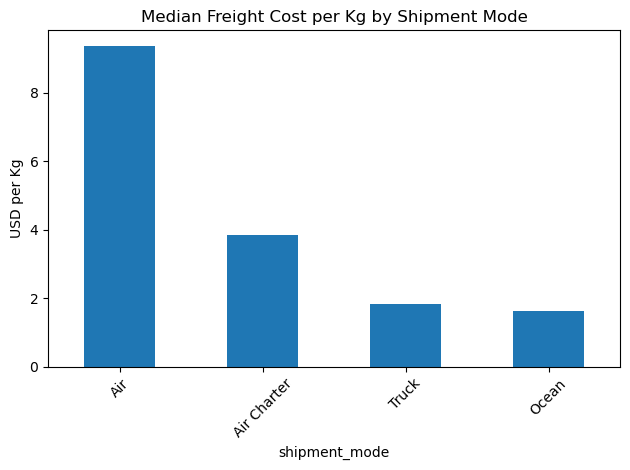

In [23]:
df.groupby("shipment_mode")["freight_per_kg"].median().sort_values(ascending = False).plot(kind = "bar")
plt.title("Median Freight Cost per Kg by Shipment Mode")
plt.ylabel("USD per Kg")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../images/freight_cost_per_kg_by_mode.png", dpi=150)
plt.show()

**Insight:**

Freight cost per kilogram shows significant variation across shipment modes. Air transport incurs the highest cost per kilogram, reflecting the premium paid for speed and reliability. Air Charter shipments exhibit higher variability in cost efficiency. 

In contrast, truck and ocean shipments provide substantially better cost efficiency when delivery timelines allow.

### 5. Performance Breakdown & Comparisons

#### 5.1 On-time by Shipment mode

In [24]:
df.groupby("shipment_mode")["on_time"].mean().sort_values(ascending = False) * 100

shipment_mode
Air            90.397513
Air Charter    88.461538
Truck          83.922261
Ocean          82.479784
Name: on_time, dtype: float64

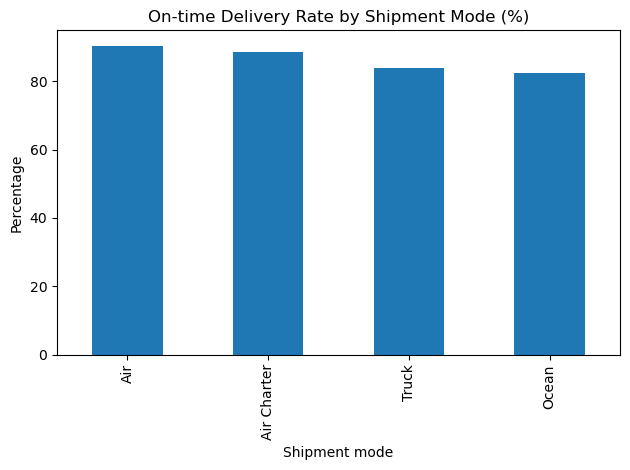

In [25]:
(df.groupby("shipment_mode")["on_time"].mean().sort_values(ascending = False) * 100).plot(kind="bar")
plt.title("On-time Delivery Rate by Shipment Mode (%)")
plt.ylabel("Percentage")
plt.xlabel("Shipment mode")
plt.tight_layout()
plt.savefig("../images/on_time_by_shipment_mode.png", dpi=150)
plt.show()

#### 5.2 Median lead time by country

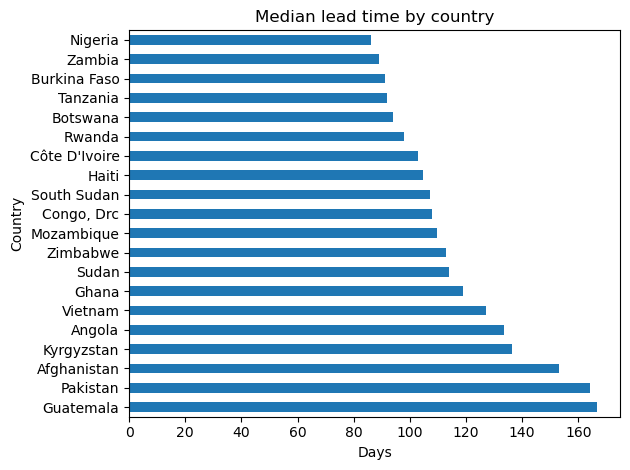

In [26]:
df.groupby("country")["lead_time_days"].median().sort_values(ascending = False).head(20).plot(kind = "barh")
plt.title("Median lead time by country")
plt.xlabel("Days")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("../images/median_lead_time_by_country.png", dpi=150)
plt.show()

#### 5.3 Freight cost per kg by shipment mode

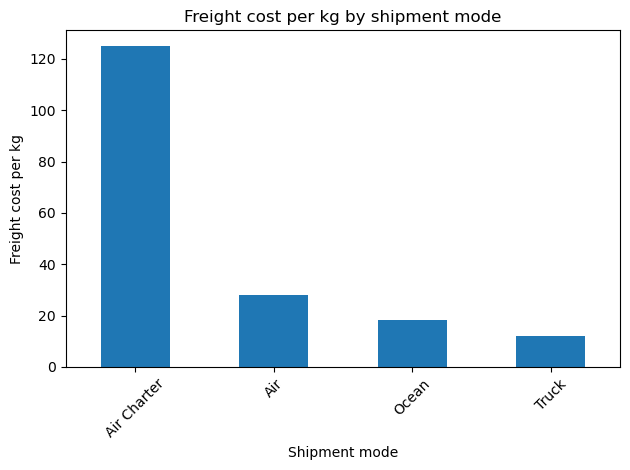

shipment_mode
Air Charter    124.839041
Air             27.994162
Ocean           18.364119
Truck           12.028932
Name: freight_per_kg, dtype: float64

In [27]:
df.groupby("shipment_mode")["freight_per_kg"].mean().sort_values(ascending = False).plot(kind = "bar")
plt.title("Freight cost per kg by shipment mode")
plt.xlabel("Shipment mode")
plt.ylabel("Freight cost per kg")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("../images/freight_cost_per_kg_by_shipment_mode.png", dpi=150)
plt.show()
df.groupby("shipment_mode")["freight_per_kg"].mean().sort_values(ascending = False)

#### 5.4 Year-over-year on-time delivery trend

Text(0, 0.5, 'On-time percentage')

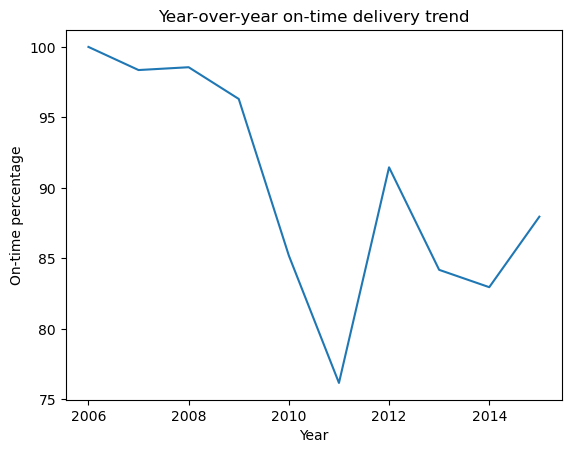

In [28]:
(df.groupby("delivered_year")["on_time"].mean() * 100).round(2).plot(kind = "line")
plt.title("Year-over-year on-time delivery trend")
plt.xlabel("Year")
plt.ylabel("On-time percentage")

In [29]:
kpi_summary = pd.DataFrame({
    "Metric": [
        "On-time delivery rate (%)",
        "Median lead time (days)",
        "Lead time IQR (days)",
        "Median freight cost per kg (USD)"
    ],
    "Value": [
        round(df["on_time"].mean() * 100, 2),
        df["lead_time_days"].median(),
        df["lead_time_days"].quantile(0.75) - df["lead_time_days"].quantile(0.25),
        round(df["freight_per_kg"].median(), 2)
    ]
})

kpi_summary

,Metric,Value
0,On-time delivery rate (%),88.51
1,Median lead time (days),92.00
2,Lead time IQR (days),93.00
3,Median freight cost per kg (USD),6.32
